In [29]:
import pandas as pd
PA = pd.read_csv("PitcherAdvanced2022.csv")
PBB = pd.read_csv("PitcherBattedBalls2022.csv")
PS = pd.read_csv("PitcherStandard2022.csv")

In [30]:
PSA = PS.merge(PA[["K/9","BB/9","K/BB","K%","BB%","K-BB%","WHIP","BABIP","LOB%","FIP","xFIP","playerId"]],on="playerId",how="left")
PSA.to_excel("PitcherCombine.xlsx")

In [31]:
TBA = pd.read_csv("TeamBattingAdvanced2022.csv")
TBBB = pd.read_csv("TeamBattingBattedBalls2022.csv")
TBS = pd.read_csv("TeamBattingStandard2022.csv")

In [32]:
TBSA = TBS.merge(TBA[["Tm","BB%","K%","BB/K","OBP","SLG","OPS","ISO","BABIP","wRC","wRAA","wOBA","wRC+"]],on="Tm",how="left")
TBSA.to_excel("TeamBattingCombine.xlsx")

In [33]:
TBG = pd.read_csv("TeamBattingGame2022.csv")
TBG["Id"] = TBG["Date"]+TBG["Pull%"].astype(str)+TBG["Cent%"].astype(str)+TBG["Oppo%"].astype(str)
TPG = pd.read_csv("TeamPitchingGame2022.csv")
TPG["Id"] = TPG["Date"]+TPG["Pull%"].astype(str)+TPG["Cent%"].astype(str)+TPG["Oppo%"].astype(str)

G = TPG[["Date","Tm","Id"]].merge(TBG[["Tm","Id"]],on="Id",suffixes=('_Pitching', '_Batting'))
#G.to_excel("GameMatchup.xlsx")

In [34]:
TBSA["Tm_Batting"] = TBSA["Tm"]
GTB = TBSA.merge(G[["Date","Tm_Pitching","Tm_Batting"]],on="Tm_Batting",how="right")
GTB["Id"] = GTB["Date"]+GTB["Tm_Pitching"]
GTB.drop_duplicates()


,Season,Tm,G,PA,AB,H,1B,2B,3B,HR,...,ISO,BABIP,wRC,wRAA,wOBA,wRC+,Tm_Batting,Date,Tm_Pitching,Id
0,2022,CHC,1659,6072,5425,1293,838,265,31,159,...,0.148203,0.294240,680.524810,-13.786847,0.306945,97.505151,CHC,2022-04-07,MIL,2022-04-07MIL
1,2022,PIT,1636,5912,5331,1186,778,221,29,158,...,0.141249,0.277238,577.138927,-98.877297,0.288710,84.226686,PIT,2022-04-07,STL,2022-04-07STL
2,2022,SDP,1628,6175,5468,1317,871,275,18,153,...,0.140819,0.288547,698.402938,-7.686403,0.308077,101.810046,SDP,2022-04-07,ARI,2022-04-07ARI
3,2022,KCR,1614,6010,5437,1327,904,247,38,138,...,0.135553,0.293146,647.700875,-39.521302,0.301562,92.525076,KCR,2022-04-07,CLE,2022-04-07CLE
4,2022,HOU,1588,6054,5409,1341,830,284,13,214,...,0.176003,0.277723,761.237975,68.984554,0.323958,112.332435,HOU,2022-04-07,LAA,2022-04-07LAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,2022,HOU,1588,6054,5409,1341,830,284,13,214,...,0.176003,0.277723,761.237975,68.984554,0.323958,112.332435,HOU,2022-10-05,PHI,2022-10-05PHI
5064,2022,LAA,1656,5977,5423,1265,825,219,31,190,...,0.156924,0.289056,638.269408,-45.179336,0.300121,93.103173,LAA,2022-10-05,OAK,2022-10-05OAK
5065,2022,LAD,1597,6247,5526,1418,850,325,31,212,...,0.185125,0.302029,847.738428,133.416142,0.336560,119.175862,LAD,2022-10-05,COL,2022-10-05COL
5066,2022,CHC,1659,6072,5425,1293,838,265,31,159,...,0.148203,0.294240,680.524810,-13.786847,0.306945,97.505151,CHC,2022-10-05,CIN,2022-10-05CIN


In [35]:
S = pd.read_csv("Starts2022.csv")
SPSA = PSA.merge(S[["Tm","Date","SO","playerId"]],on="playerId",how="right",suffixes=('', '_Outting'))
SPSA["Id"] = SPSA["Date"]+SPSA["Tm_Outting"]

In [36]:
combine = GTB.merge(SPSA,on="Id",suffixes=('_Hitting', '_Pitcher'),how="right")
combine.to_excel("alldata.xlsx")

In [37]:
#combine.corr().to_excel("corr.xlsx")

C:\Users\maeya\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


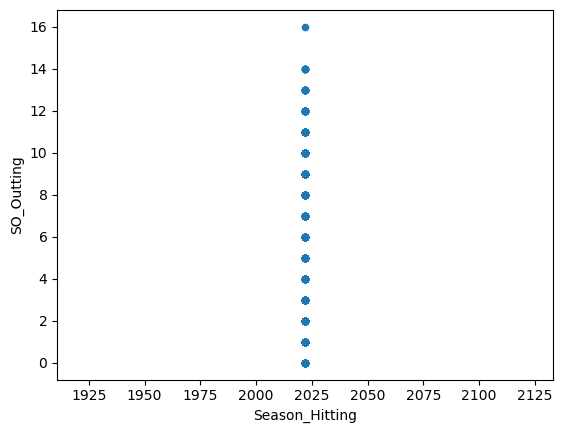

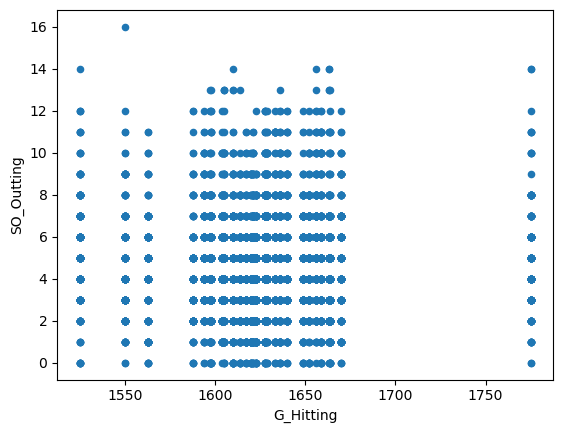

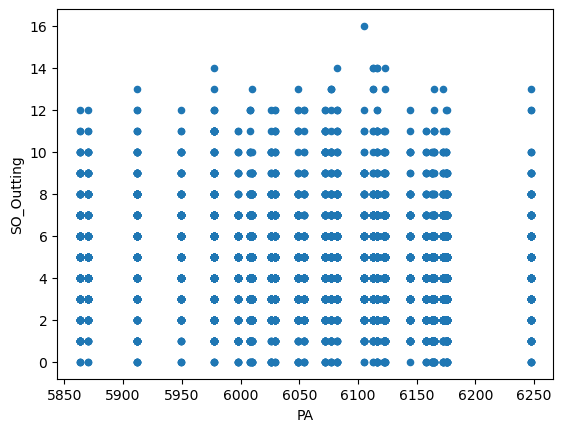

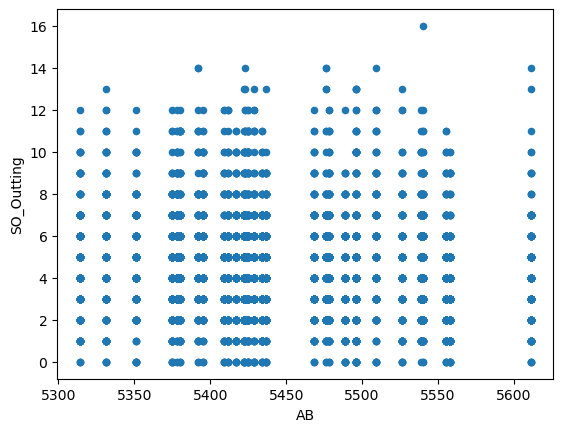

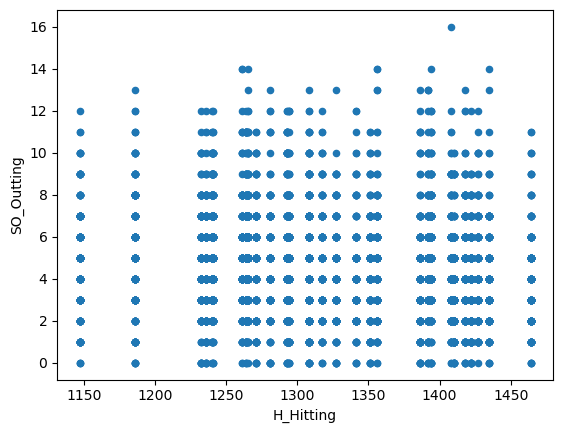

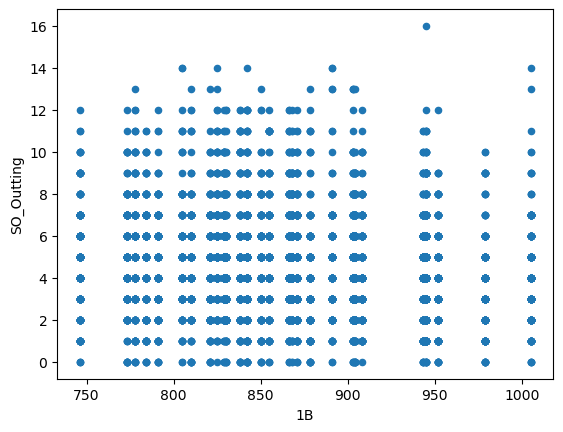

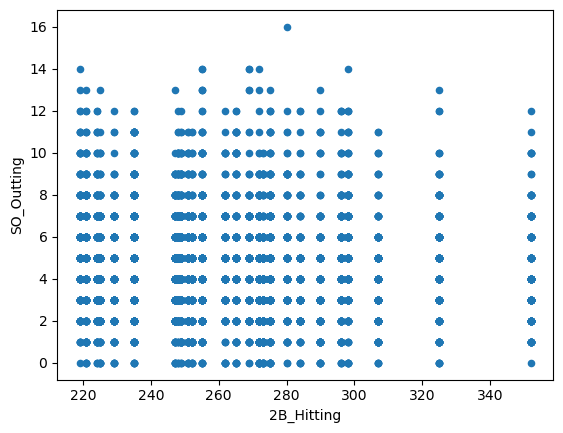

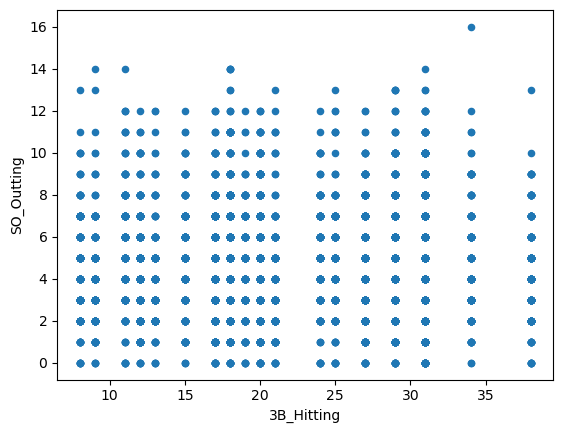

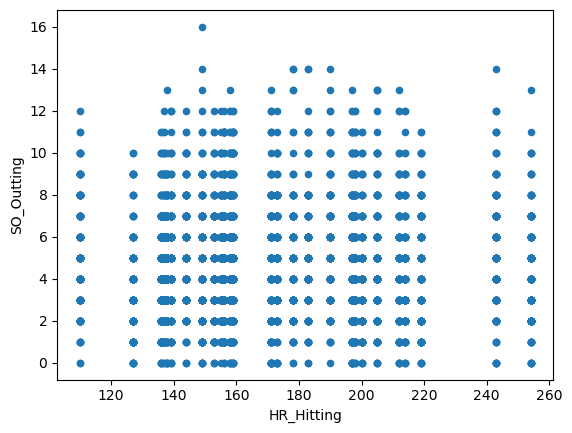

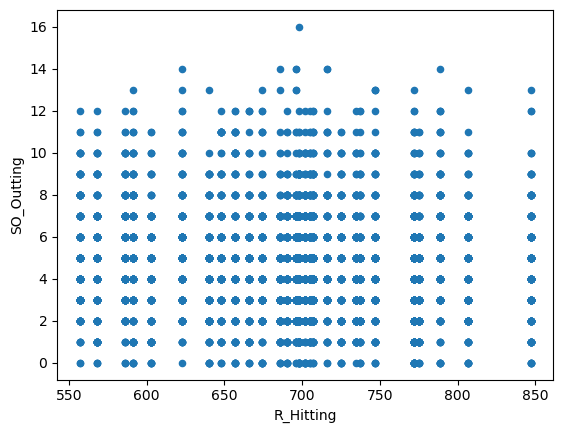

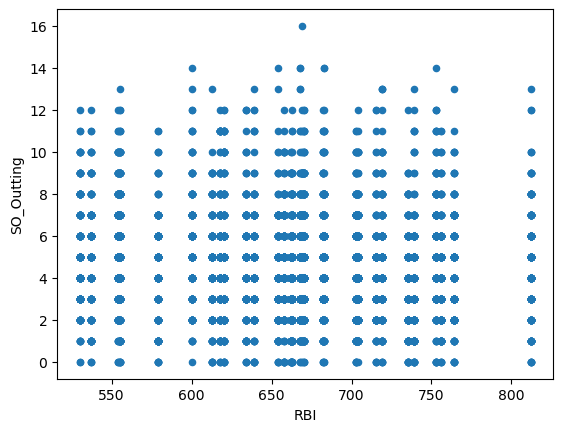

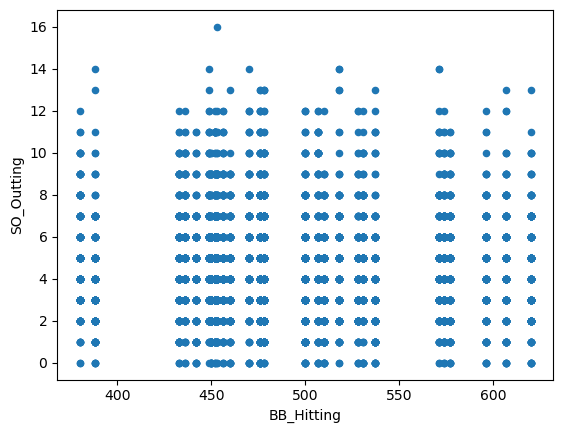

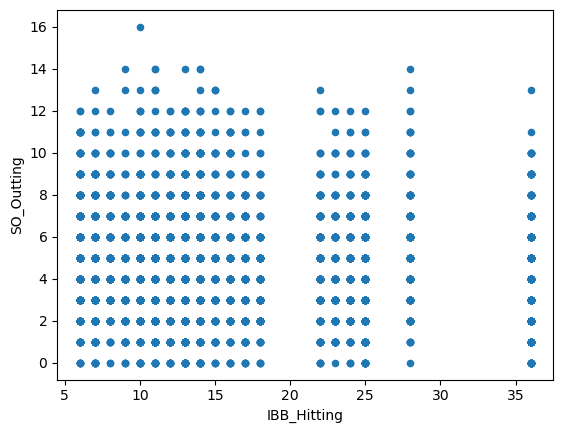

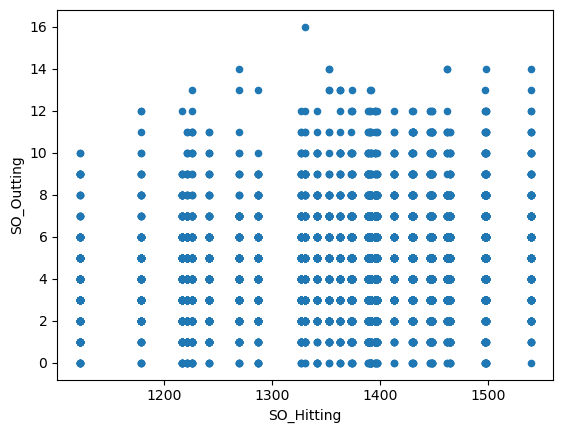

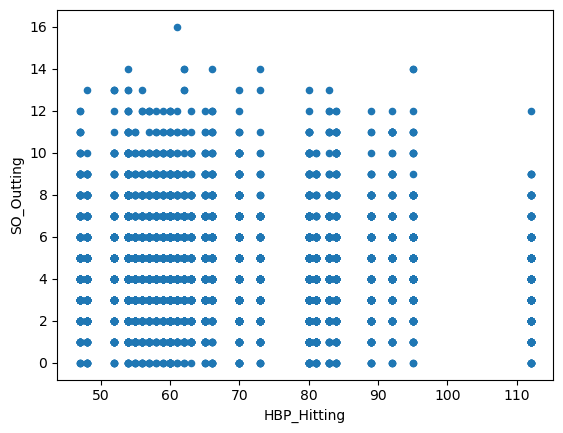

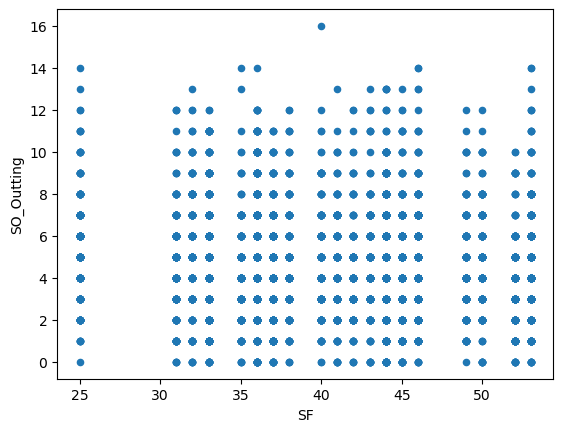

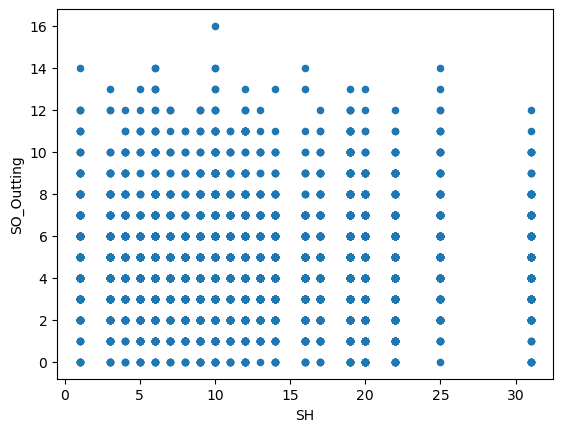

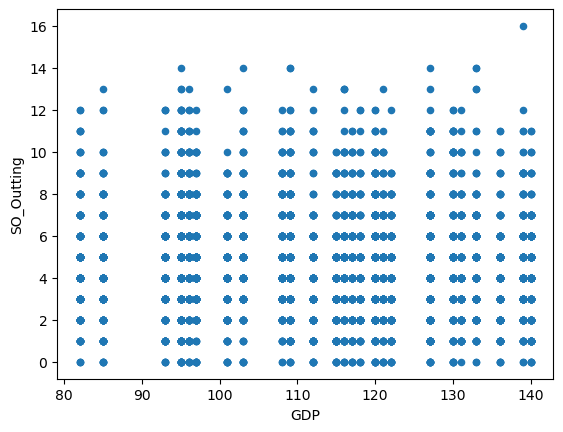

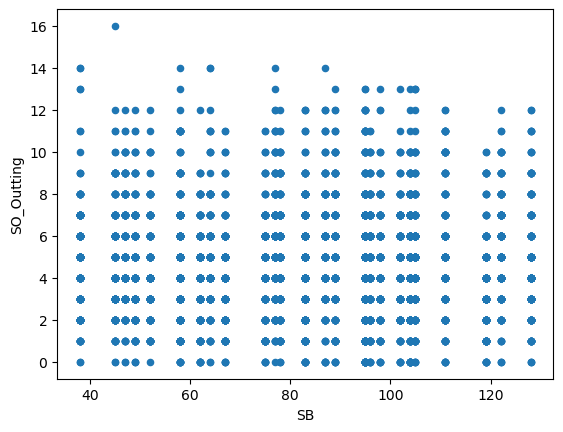

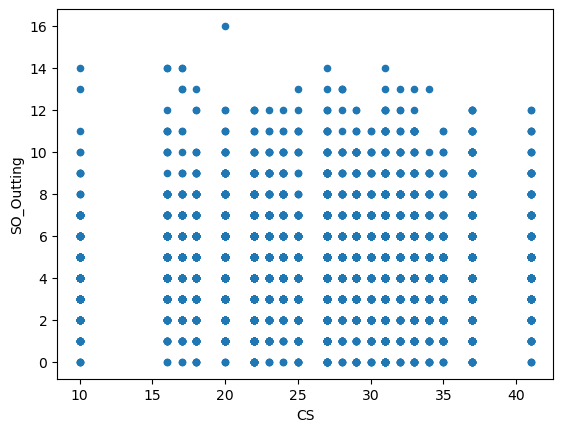

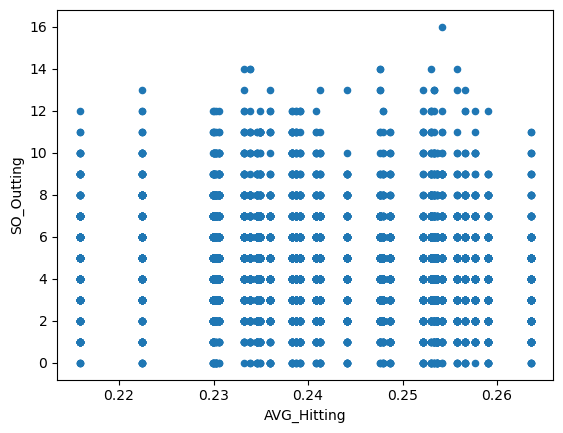

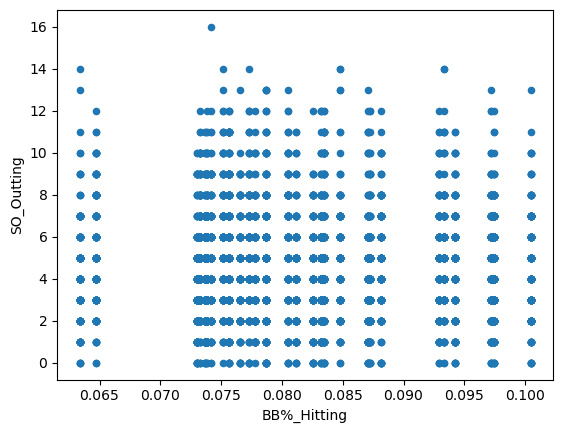

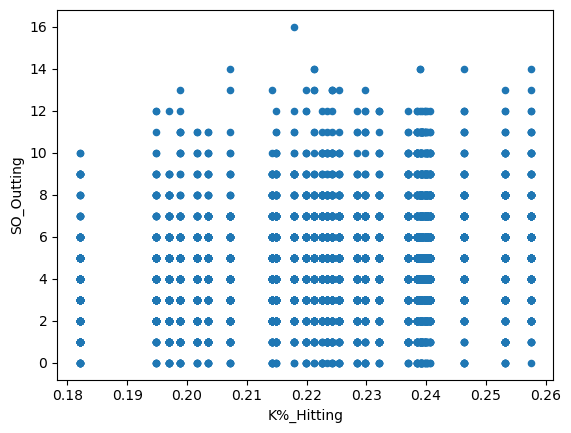

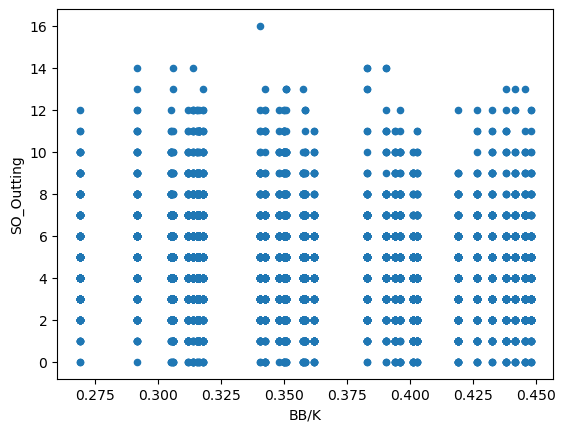

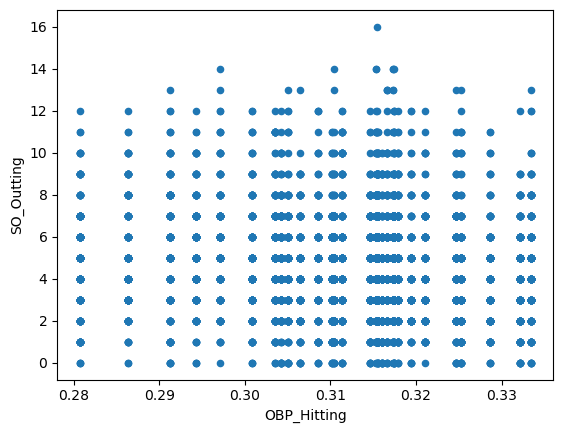

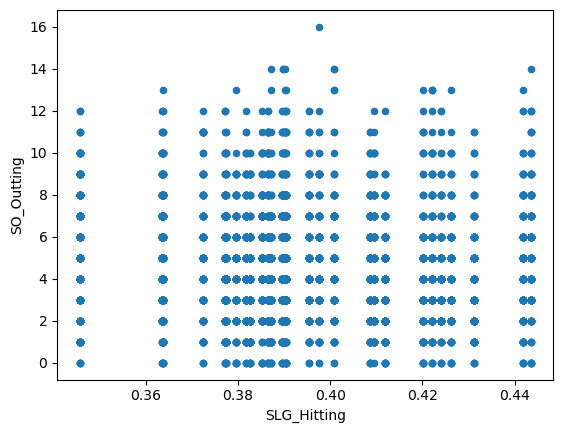

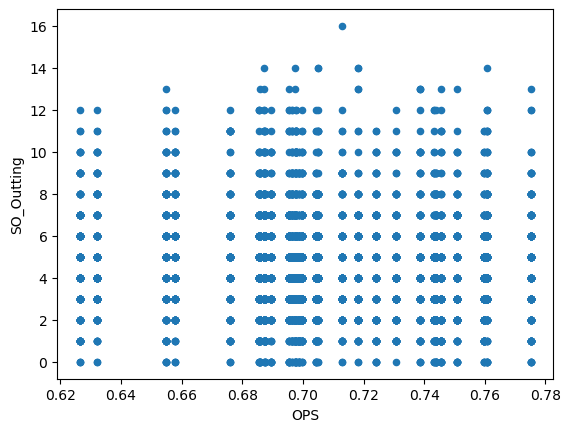

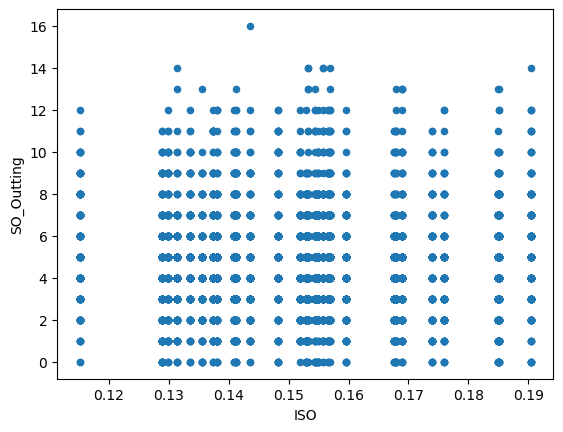

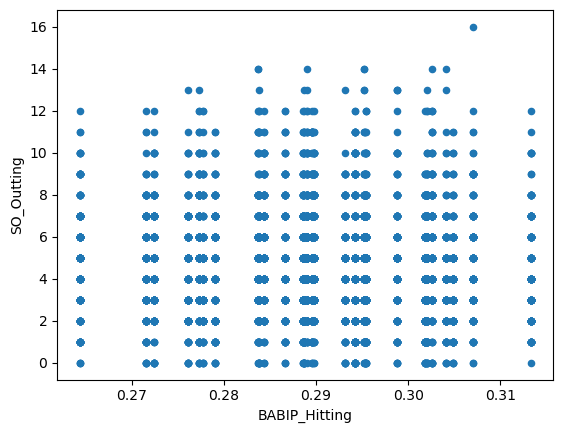

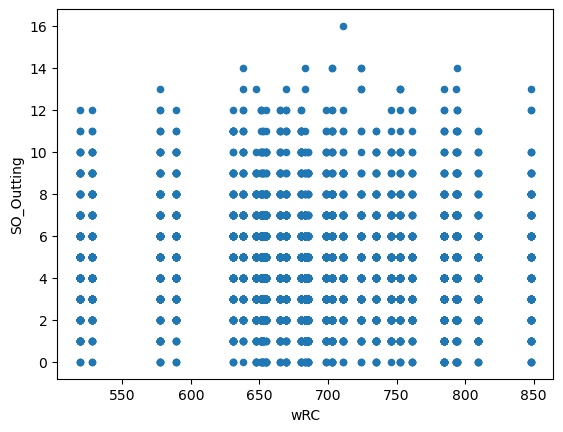

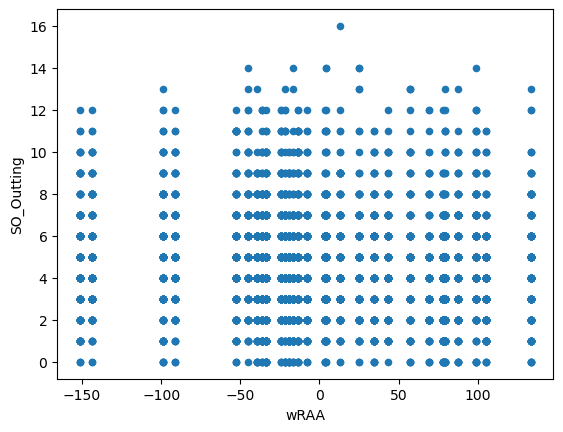

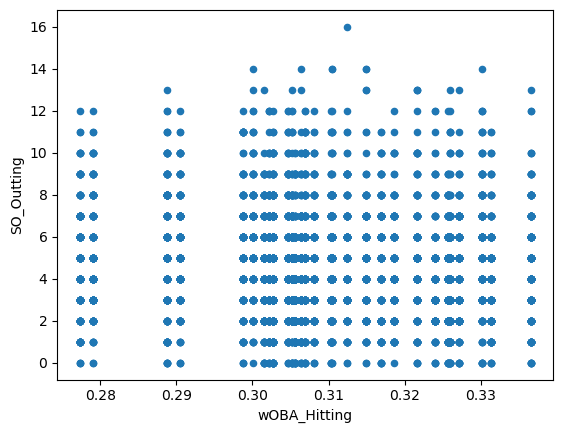

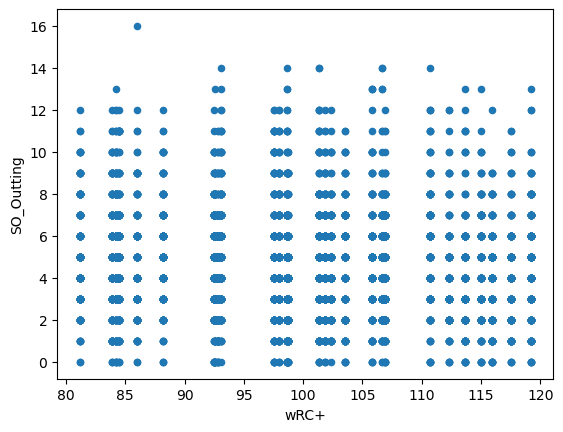

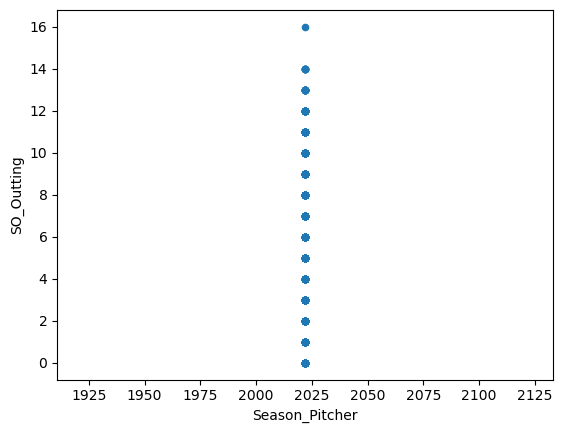

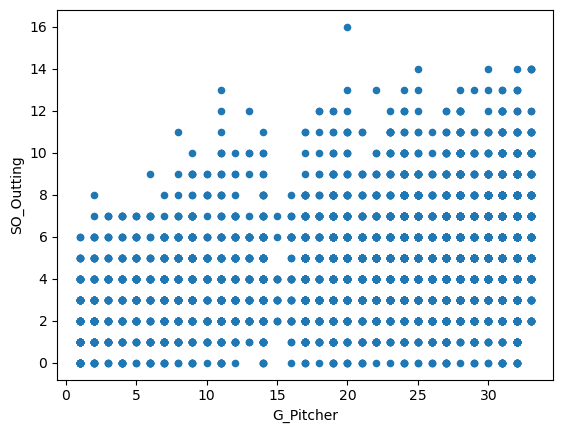

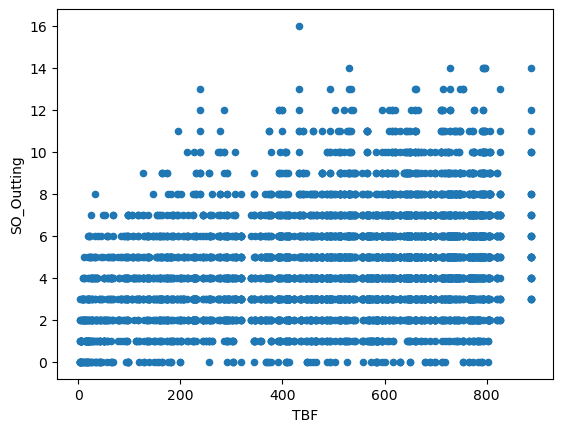

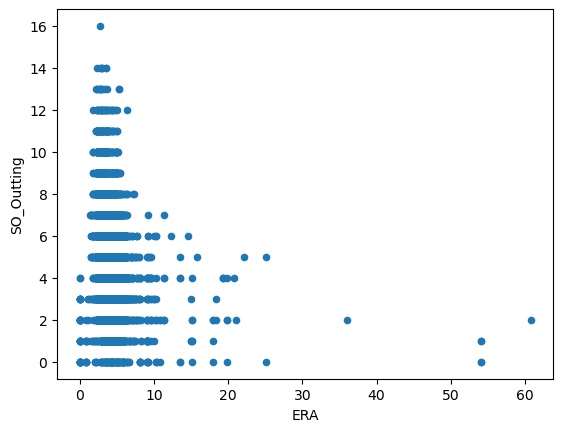

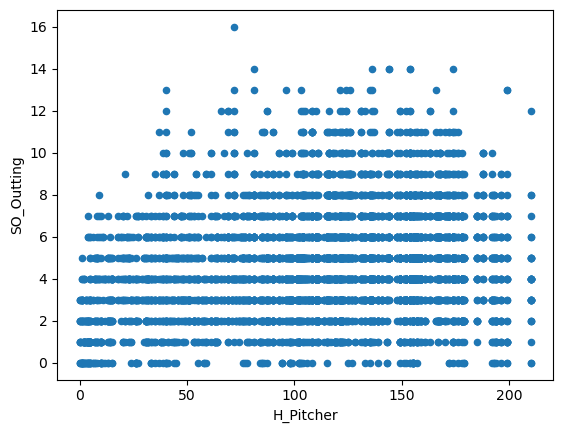

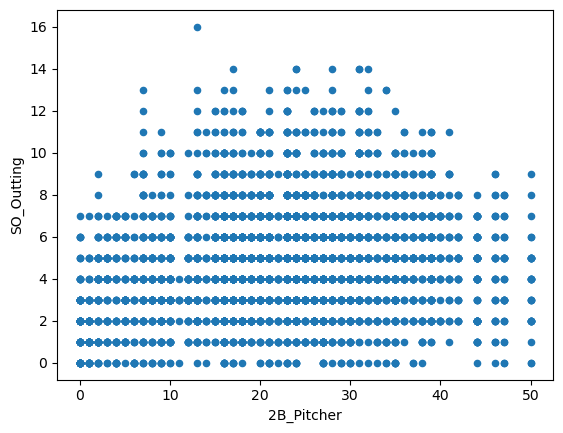

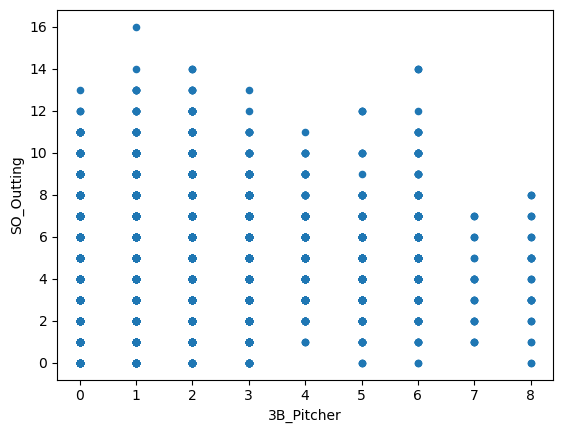

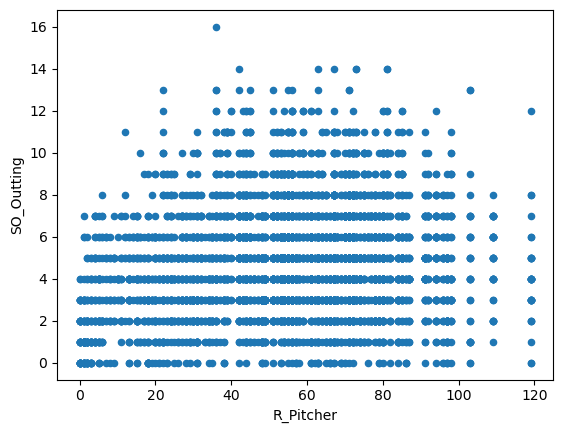

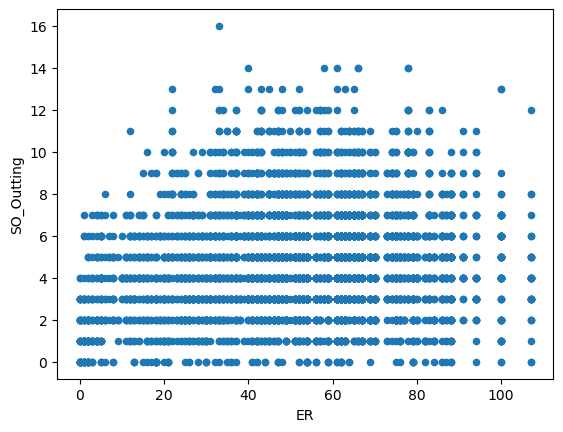

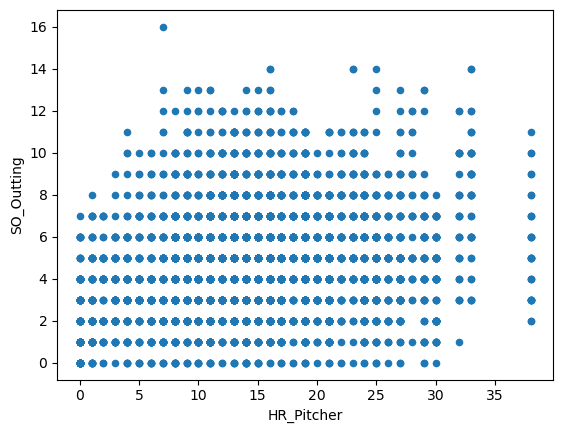

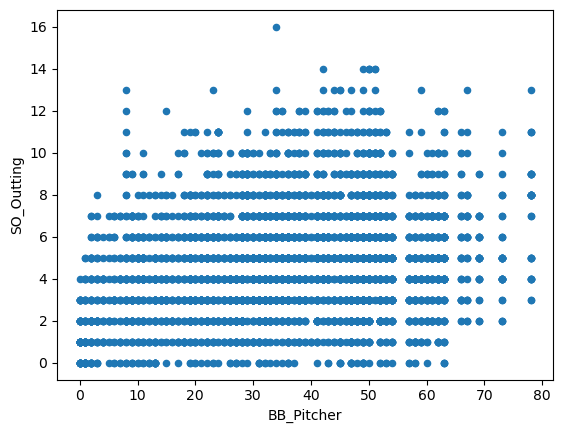

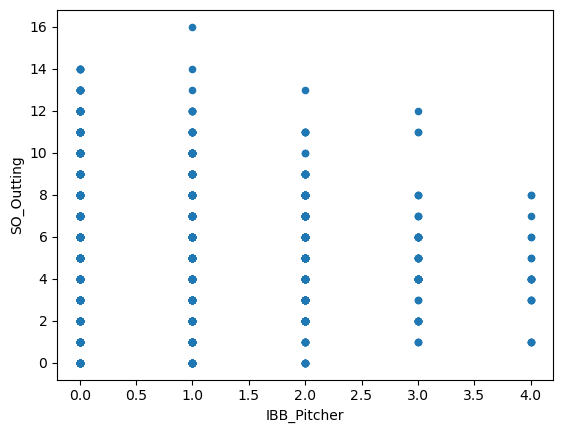

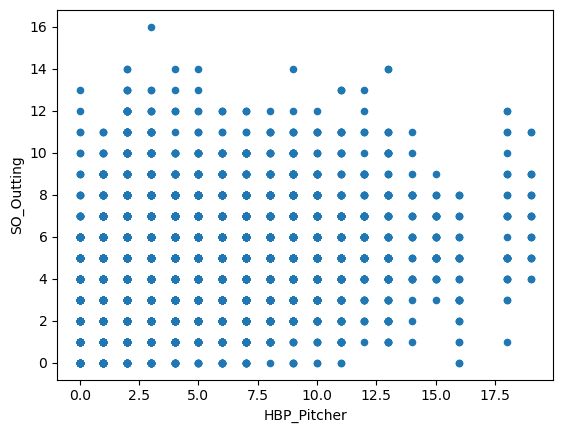

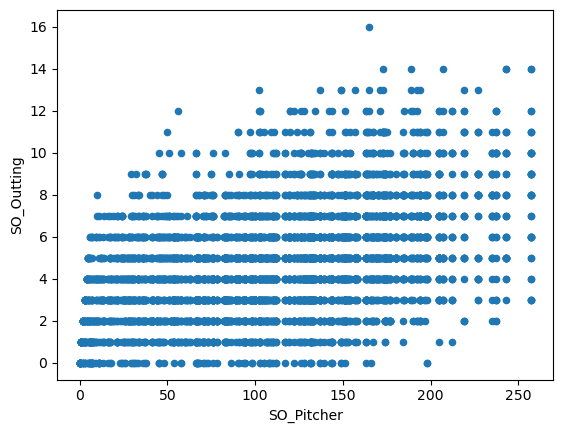

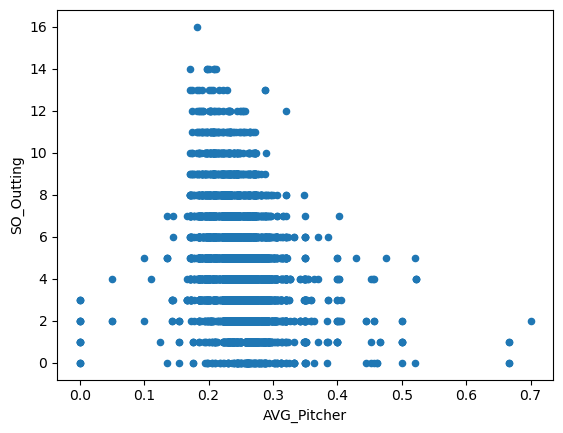

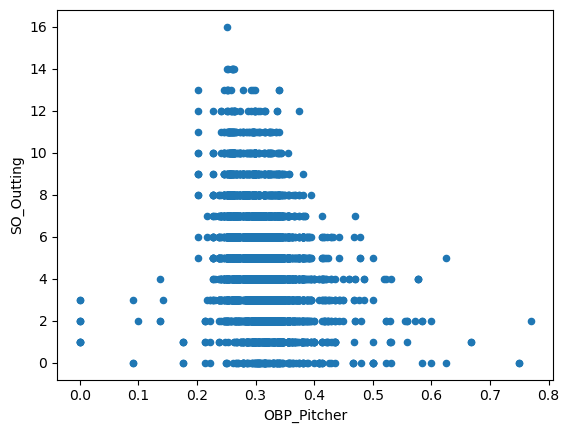

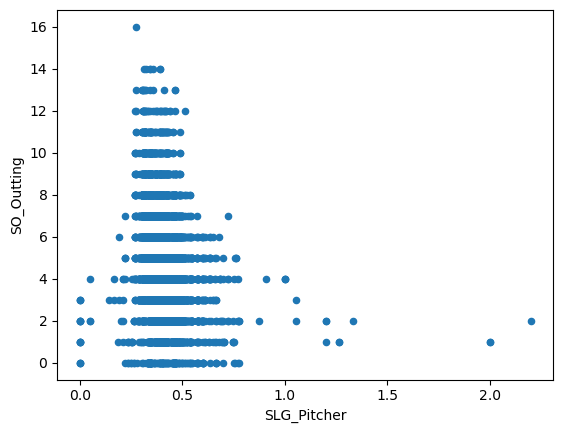

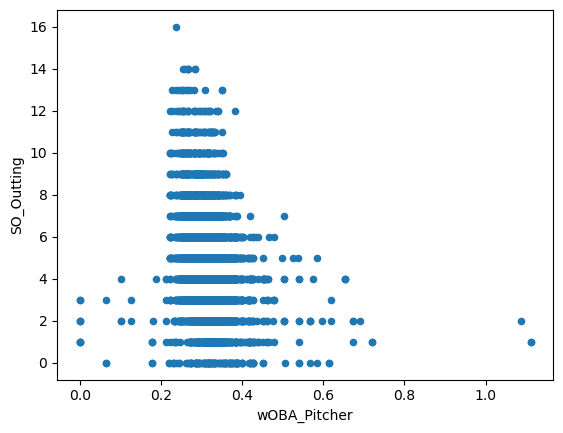

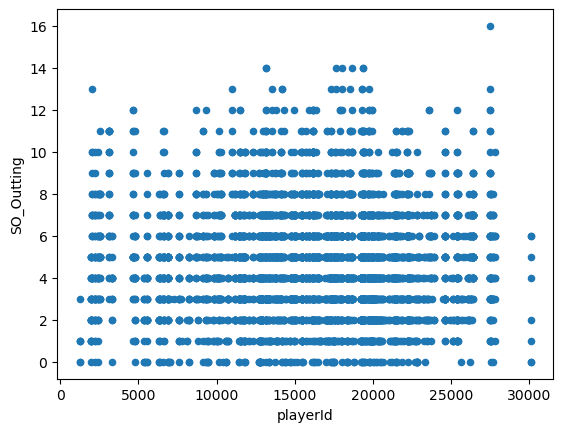

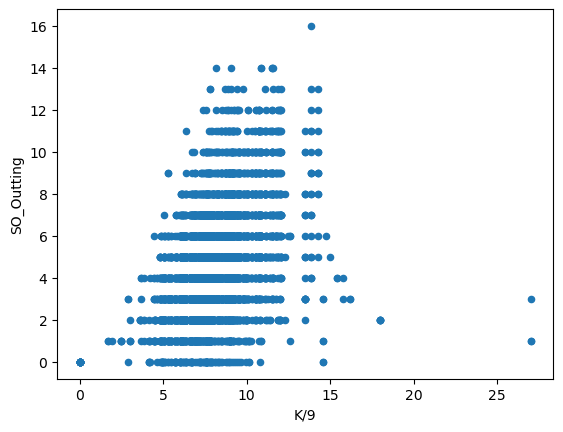

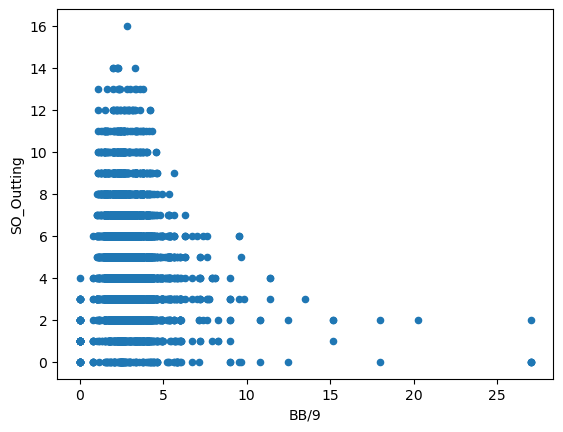

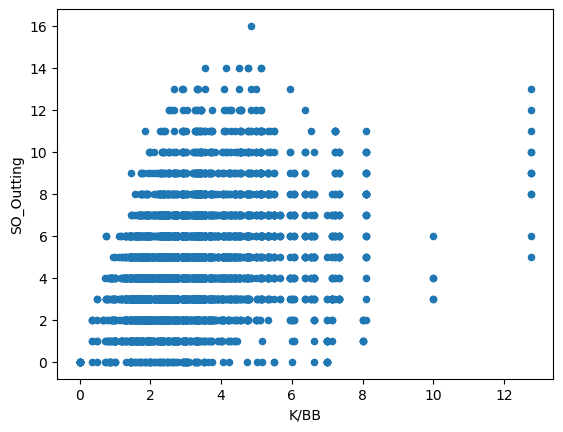

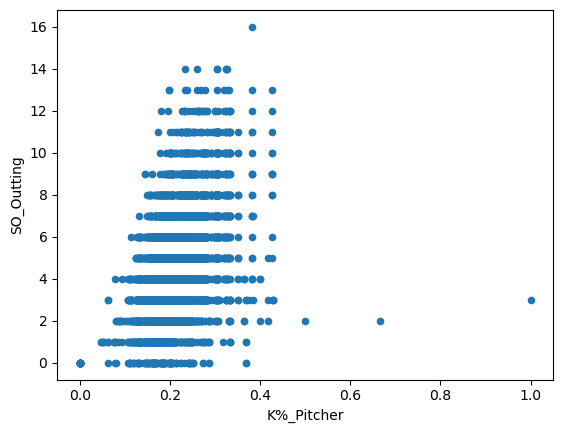

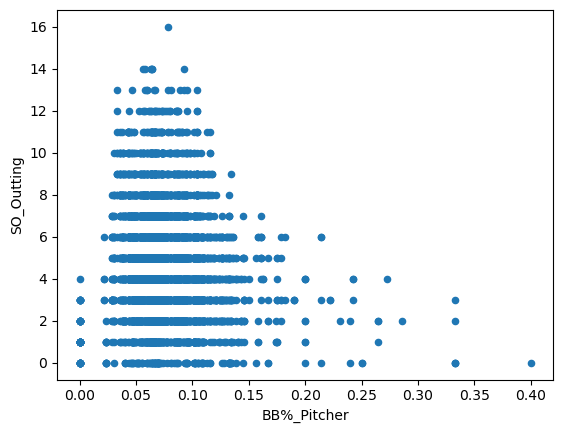

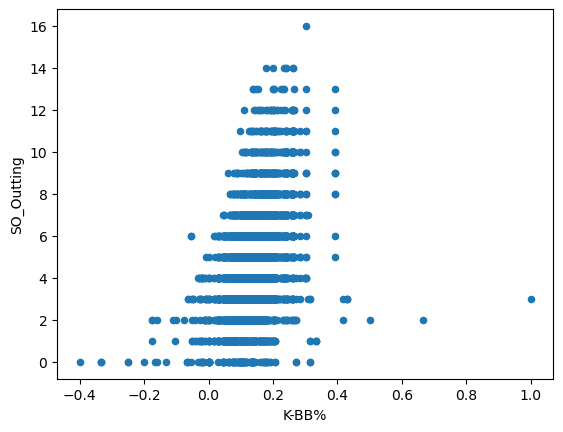

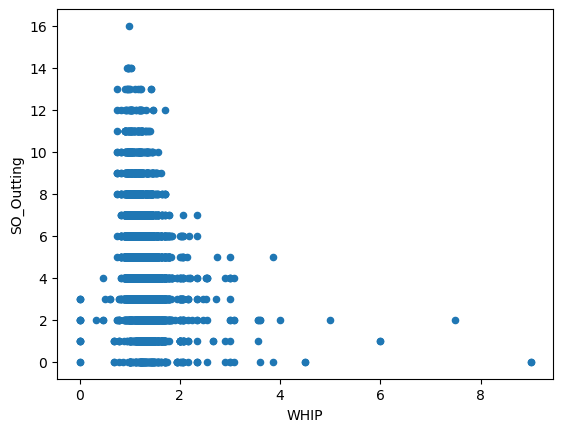

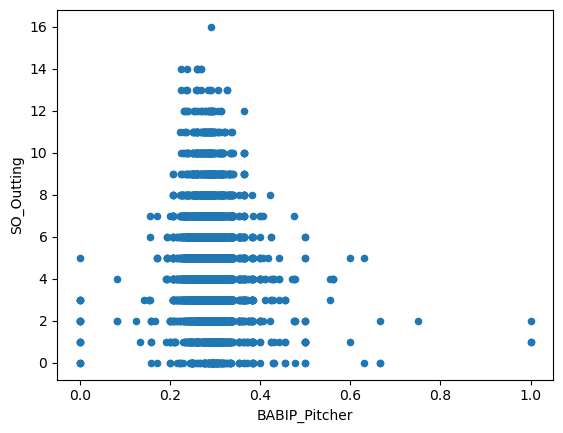

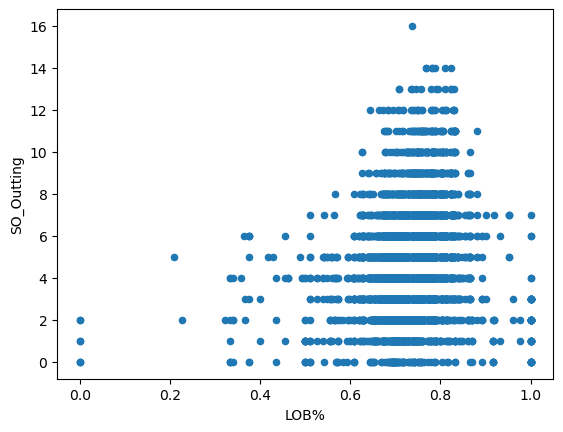

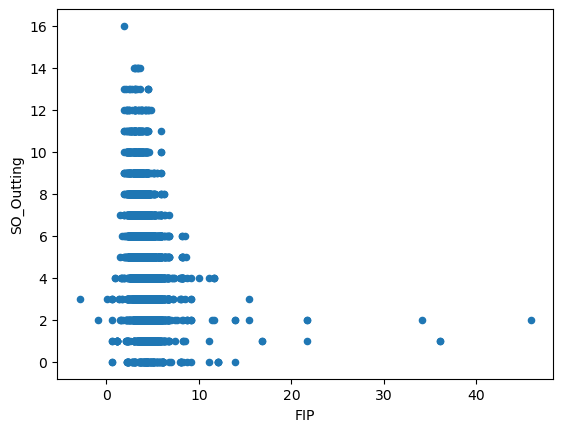

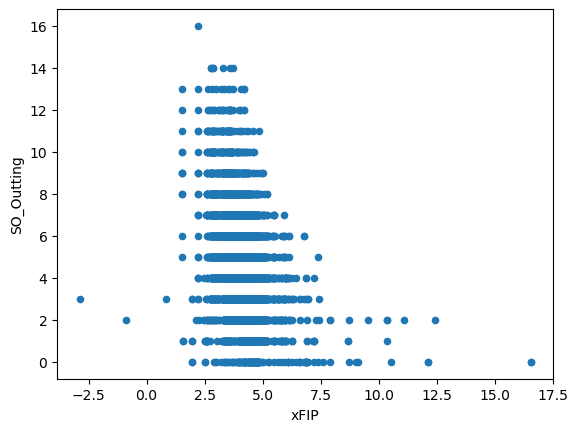

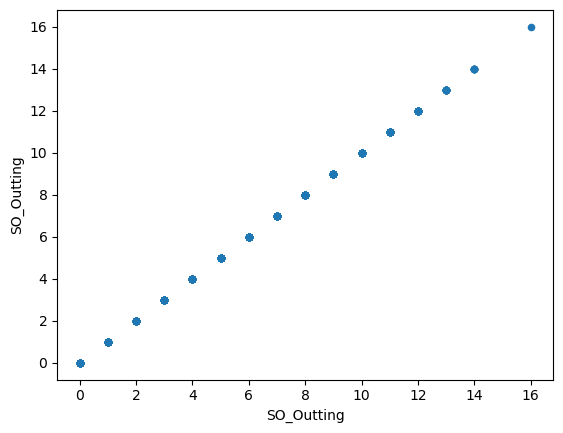

In [38]:
for (colname,colval) in combine.iteritems():
    if not isinstance(colval[0],str):
        combine.plot.scatter(x=colname,y="SO_Outting")

In [26]:
score = 0.0
best = ""
for (colname,colval) in combine.iteritems():
    for (colname2,colval2) in combine.iteritems():
        for (colname3,colval3) in combine.iteritems():
                if not isinstance(colval[0],str) and not isinstance(colval2[0],str)and not isinstance(colval3[0],str):
                    X=combine[[colname,colname2,colname3]]
                    Y=combine["SO_Outting"]
                    regr = linear_model.LinearRegression().fit(X.values,Y)
                    if (regr.score(X.values,Y)>score and regr.score(X.values,Y)!=1.0):
                        score = regr.score(X.values,Y)
                        best = colname+" "+colname2+" "+colname3+" "
print(best)
print(score)


K%_Hitting SO_Pitcher K%_Pitcher 
0.28015670809778903


In [46]:
X=combine[["K%_Hitting","SO_Pitcher","K%_Pitcher"]]
Y=combine["SO_Outting"]
regr = linear_model.LinearRegression().fit(X.values,Y)
print(regr.coef_)
print(regr.intercept_)
for index, row in combine.iterrows():
    average += (regr.predict([[row["K%_Hitting"], row["SO_Pitcher"],row["K%_Pitcher"]]]))-(row["SO_Outting"]*(regr.predict([[row["K%_Hitting"], row["SO_Pitcher"],row["K%_Pitcher"]]])-row["SO_Outting"]))
average=average/4860
print(average)
combine["pred"] = 20.3552487*combine["K%_Hitting"] + .0122510370*combine["SO_Pitcher"] + 12.6090668*combine["K%_Pitcher"] - 3.9279623086600335
combine.corr().to_excel("corr.xlsx")


[2.03552487e+01 1.22510370e-02 1.26090668e+01]
-3.927962308660039
[10.20548956]


<AxesSubplot:xlabel='pred', ylabel='SO_Outting'>

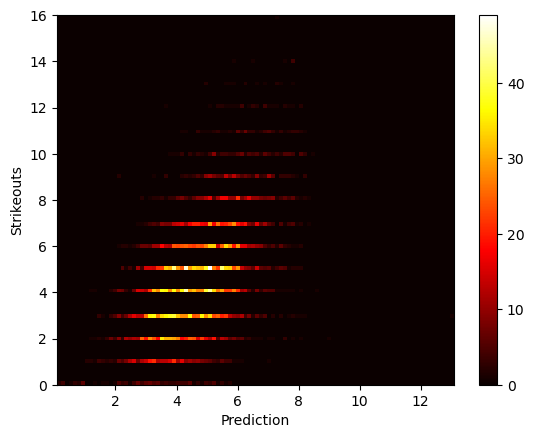

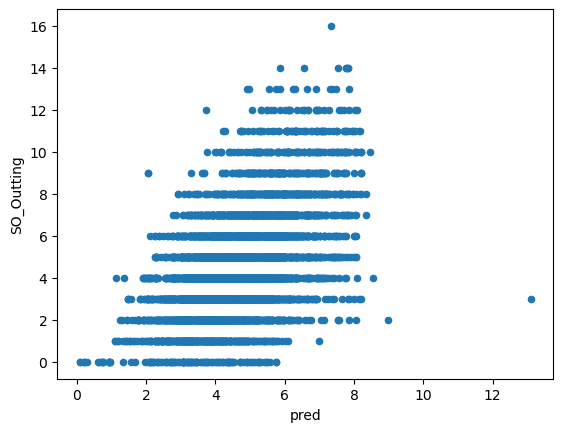

In [17]:
import matplotlib.pyplot as plt
x=combine["pred"]
y=combine["SO_Outting"]
plt.hist2d(x,y,bins = 100)
plt.xlabel("Prediction")
plt.ylabel("Strikeouts")
plt.colorbar()
plt.set_cmap('hot')
combine.plot.scatter(x="pred",y="SO_Outting")

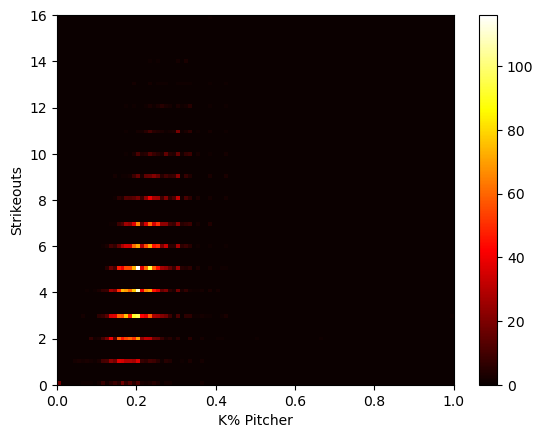

In [50]:
x=combine["K%_Pitcher"]
y=combine["SO_Outting"]
plt.hist2d(x,y,bins = 100)
plt.xlabel("K% Pitcher")
plt.ylabel("Strikeouts")
plt.colorbar()
plt.set_cmap('hot')

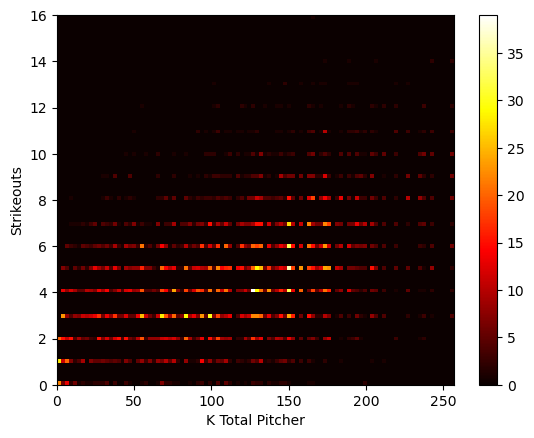

In [52]:
x=combine["SO_Pitcher"]
y=combine["SO_Outting"]

plt.hist2d(x,y,bins = 100)
plt.xlabel("K Total Pitcher")
plt.ylabel("Strikeouts")
plt.colorbar()
plt.set_cmap('hot')

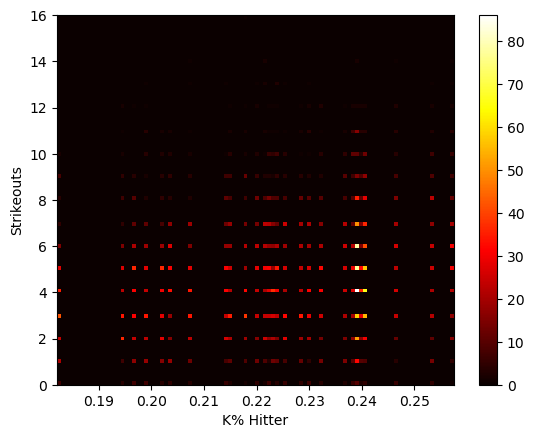

In [48]:
x=combine["K%_Hitting"]
y=combine["SO_Outting"]
plt.hist2d(x,y,bins = 100)
plt.xlabel("K% Hitter")
plt.ylabel("Strikeouts")
plt.colorbar()
plt.set_cmap('hot')